In [792]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [793]:
# Load datasets
train_features = pd.read_csv('Water Pump Project/data/4910797b-ee55-40a7-8668-10efd5c1b960.csv')
train_labels = pd.read_csv('Water Pump Project/data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
test_features = pd.read_csv('Water Pump Project/data/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')

# Merge training data
train_df = pd.merge(train_features, train_labels, on='id')

# Preview data
pd.set_option('display.max_columns', None)
train_df.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [794]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


# Data exploration , Data Cleaning and Preprocessing

As a matter of time and context, I chose to explore, clean, and preprocess the data simultaneously while reviewing each feature. This allowed me to efficiently identify issues such as missing values, inconsistencies, and outliers, and apply appropriate transformations on the spot.

In a typical project setting, we would approach this process more sequentially. First, we’d conduct a broad exploratory data analysis (EDA) to understand distributions, relationships, and data quality. Then, we’d move on to a dedicated data cleaning phase to handle missing or incorrect values, followed by preprocessing tasks such as encoding categorical variables, feature scaling, and creating derived features. For this challenge, I streamlined the process to move faster without sacrificing key data understanding.

## amount_tsh

amount_tsh represents the amount of water available at a pump, technically known as total static head—the vertical distance water can be raised by the pump. A valid static head can't realistically be zero since that would imply no need for a pump at all. However, 70% of entries are zero, suggesting that zeros represent missing data rather than actual measurements. Due to the high rate of missing values (70%), imputing this variable would likely introduce bias, so it will be excluded from the analysis.

Percentage of zeros in 'amount_tsh': 70.10%


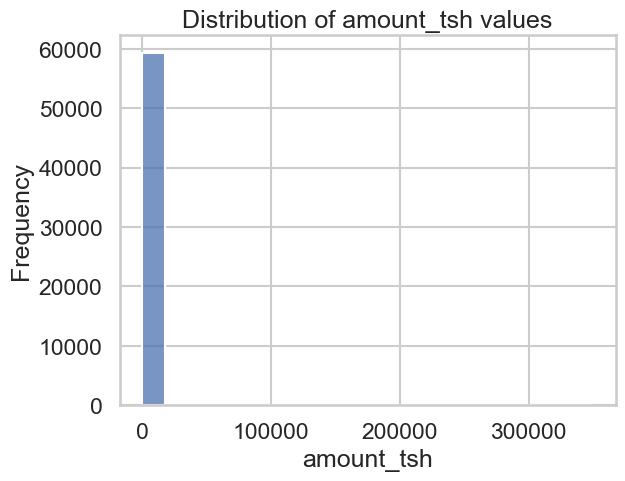

In [795]:
# Calculate percentage of zeros in 'amount_tsh'
zero_percentage = (train_df['amount_tsh'] == 0).mean() * 100
print(f"Percentage of zeros in 'amount_tsh': {zero_percentage:.2f}%")

sns.histplot(train_features['amount_tsh'], bins=20, kde=False)
plt.title('Distribution of amount_tsh values')
plt.xlabel('amount_tsh')
plt.ylabel('Frequency')
plt.show()

# add 'amount_tsh' to columns to be dropped
drop_cols = ['amount_tsh']

# date_recorded

date_recorded indicates when the pump's status was entered into the system. While the exact date may not directly influence pump functionality, the season could. Tanzania experiences four seasons: "Long Rains" (Mar–May), "Long Dry" (Jun–Oct), "Short Rains" (Nov–Dec), and "Short Dry" (Jan–Feb). Analysis reveals a notable seasonal effect: pumps recorded during the "Long Rains" had a higher functional rate (60%) compared to those recorded in the "Short Dry" season (50%). Thus, a new feature RecordingSeason capturing these seasons will be created and used in further analysis.

status_group     functional  functional needs repair  non functional
RecordingSeason                                                     
Long Dry          51.497079                 6.919426       41.583496
Long Rains        59.841741                 6.060606       34.097653
Short Dry         50.415867                 9.282363       40.301770
Short Rains       52.335025                 4.619289       43.045685


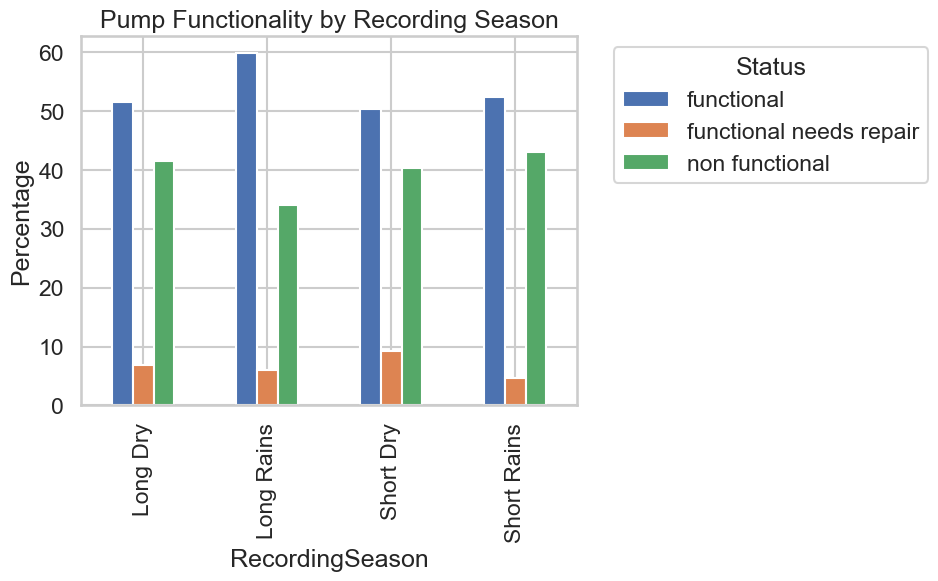

In [796]:
# Convert date to datetime
train_df['date_recorded'] = pd.to_datetime(train_df['date_recorded'])

# Define seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Long Rains'
    elif month in [6, 7, 8, 9, 10]:
        return 'Long Dry'
    elif month in [11, 12]:
        return 'Short Rains'
    else:  # January, February
        return 'Short Dry'

# Create RecordingSeason feature
train_df['RecordingSeason'] = train_df['date_recorded'].dt.month.apply(get_season)

# Check functionality rates by season
season_status = pd.crosstab(train_df['RecordingSeason'], df['status_group'], normalize='index') * 100
print(season_status)

# Plot for visualization
season_status.plot(kind='bar', stacked=False )
plt.ylabel('Percentage')
plt.title('Pump Functionality by Recording Season')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1))
plt.show()


# funder & installer

Top 20 funders:
 ['Government Of Tanzania', 'Unknown', 'Danida', 'Hesawa', 'Rwssp', 'World Bank', 'Kkkt', 'World Vision', 'Unicef', 'Tasaf', 'District Council', 'Dhv', 'Private Individual', 'Dwsp', 'Norad', 'Germany Republi', 'Tcrs', 'Ministry Of Water', 'Water', 'Dwe']

Unique values in funder_cat: 24


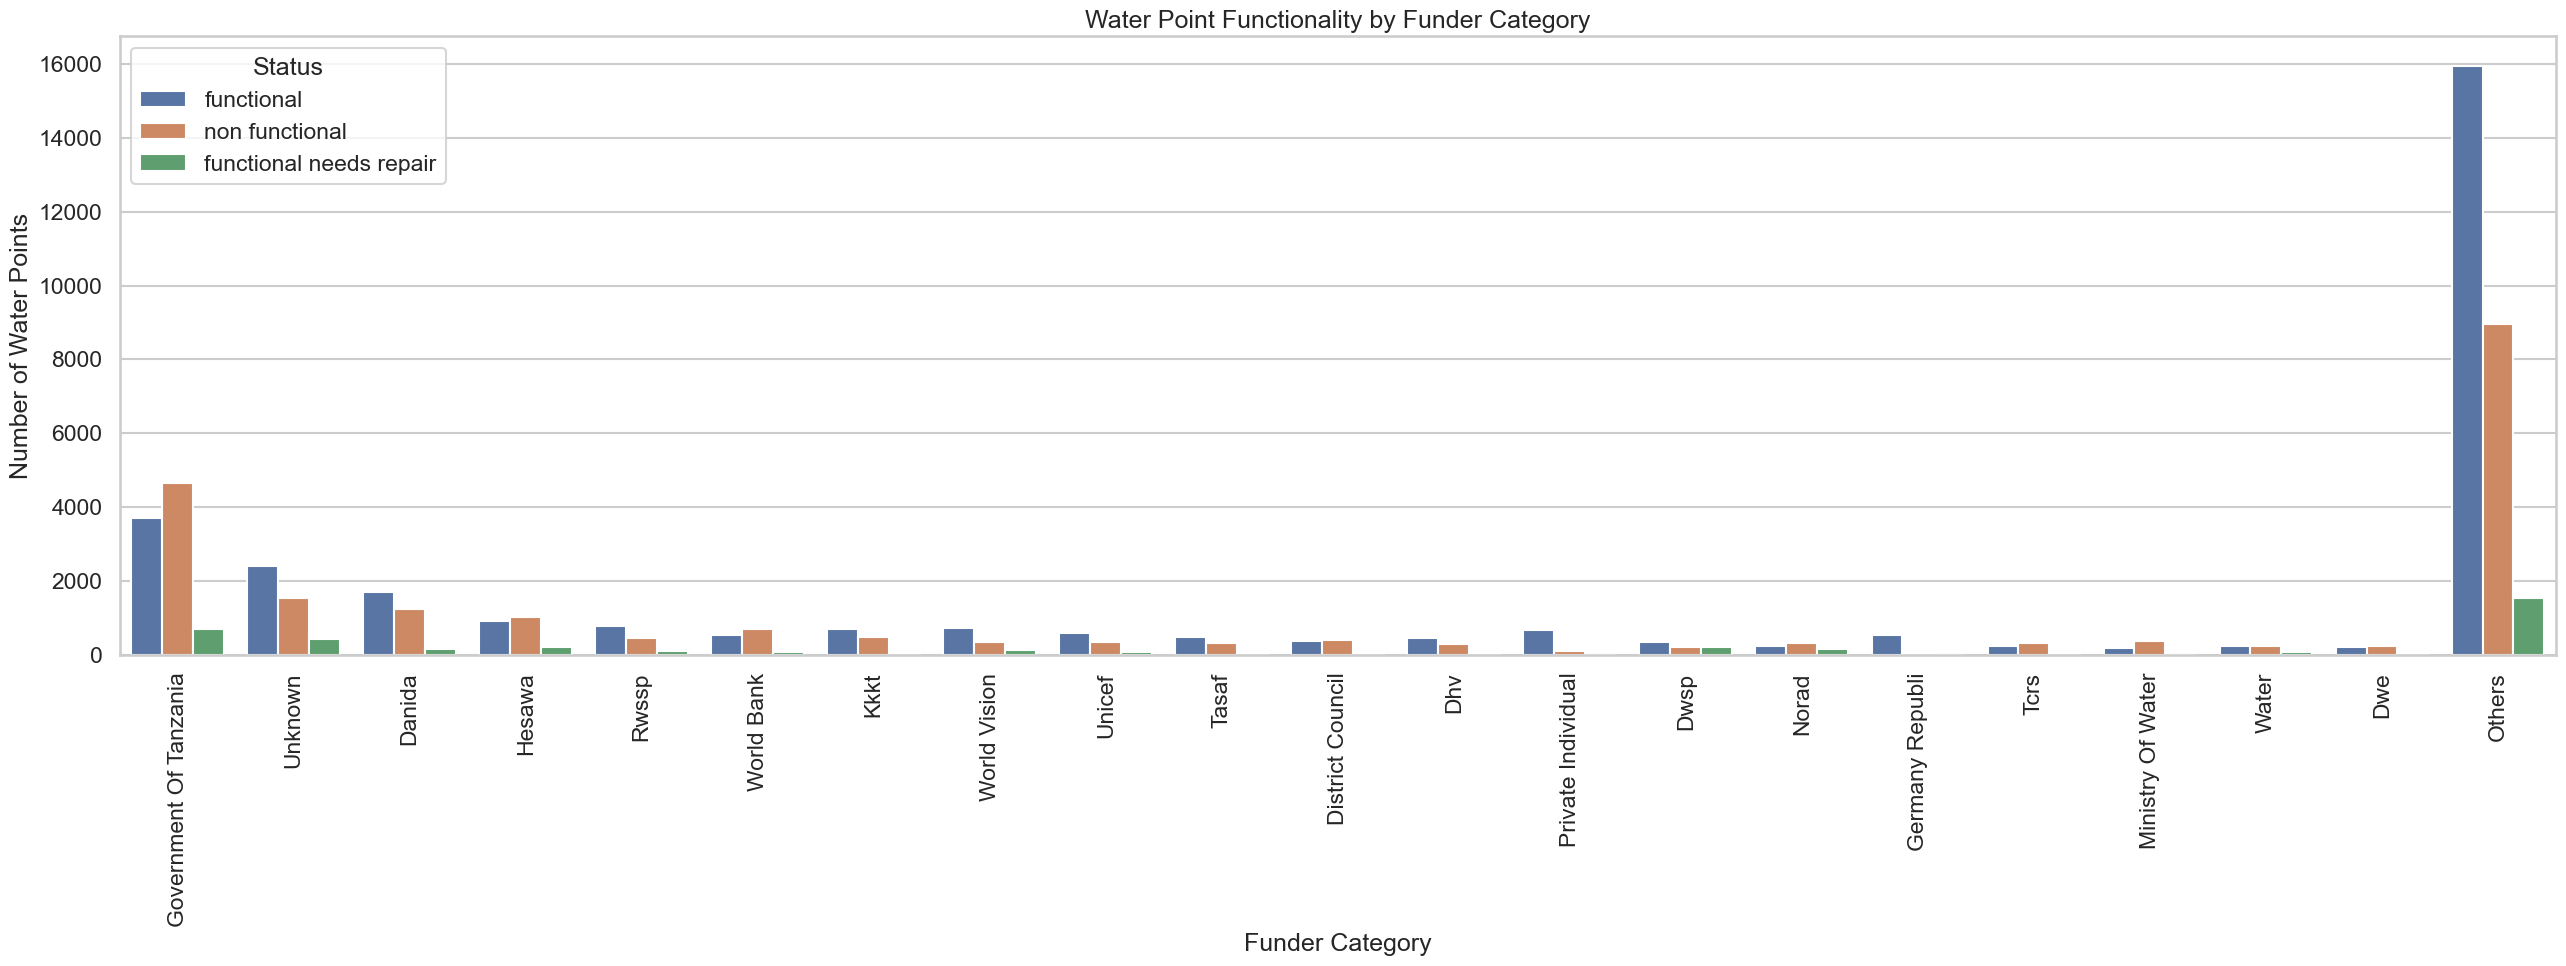

In [797]:
# Clean funder column
train_df['funder'] = train_df['funder'].fillna('Unknown')
train_df['funder'] = train_df['funder'].replace('0', 'Unknown')

# Check most common funders
top_20_funders = df['funder'].value_counts().head(20).index.tolist()
print("Top 20 funders:\n", top_20_funders)

# Create a new cleaned categorical funder column
train_df['funder_cat'] = train_df['funder'].copy()
train_df.loc[~df['funder_cat'].isin(top_20_funders), 'funder_cat'] = 'Others'

# Check number of categories
print(f"\nUnique values in funder_cat: {train_df['funder_cat'].nunique()}")  # Should be 21

# Plot distribution by funder and status
train_df_funder_subset = train_df[train_df['funder_cat'].isin(top_20_funders + ['Others'])]

plt.figure(figsize=(26, 10))
sns.countplot(data=df_funder_subset, x='funder_cat', hue='status_group',
              order=top_20_funders + ['Others'])
plt.xticks(rotation=90)
plt.title('Water Point Functionality by Funder Category')
plt.xlabel('Funder Category')
plt.ylabel('Number of Water Points')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


As we can see below , pumps funded by foreign governments and international NGOs consistently exhibit higher functionality, likely due to structured maintenance protocols and professional support. In contrast, water pumps financed by local communities and Tanzanian government projects tend to have higher failure rates, suggesting resource constraints and less formal follow-up contribute to lower performance.

In [798]:
# Identify the top 20 funders by overall count
top20_funders = train_df['funder'].value_counts().head(20).index.tolist()

# Filter the dataset to only include these top 20 funders
filtered_df = train_df[train_df['funder'].isin(top20_funders)]

# Create a crosstab of funder_cat vs. status_group
crosstab = pd.crosstab(filtered_df['funder'], filtered_df['status_group'])

# Calculate the ratio: functional / non functional
crosstab['ratio'] = crosstab['functional'] / crosstab['non functional'].replace(0, 1)

# Sort by ratio in descending order
funders_order = crosstab.sort_values('ratio', ascending=True)
print("\nTop 5 funders by functional/non-functional ratio (from top 20 funders):")
funders_order[['functional', 'non functional', 'ratio']]



Top 5 funders by functional/non-functional ratio (from top 20 funders):


status_group,functional,non functional,ratio
funder,,,
Ministry Of Water,192,379,0.506596
Tcrs,241,324,0.743827
Norad,259,341,0.759531
World Bank,545,707,0.770863
Government Of Tanzania,3720,4663,0.797770
Dwe,215,245,0.877551
District Council,378,420,0.900000
Hesawa,936,1034,0.905222
Water,258,247,1.044534


In [799]:
most_effective_funders=funders_order.sort_values('ratio', ascending=True).head(5).index.tolist()

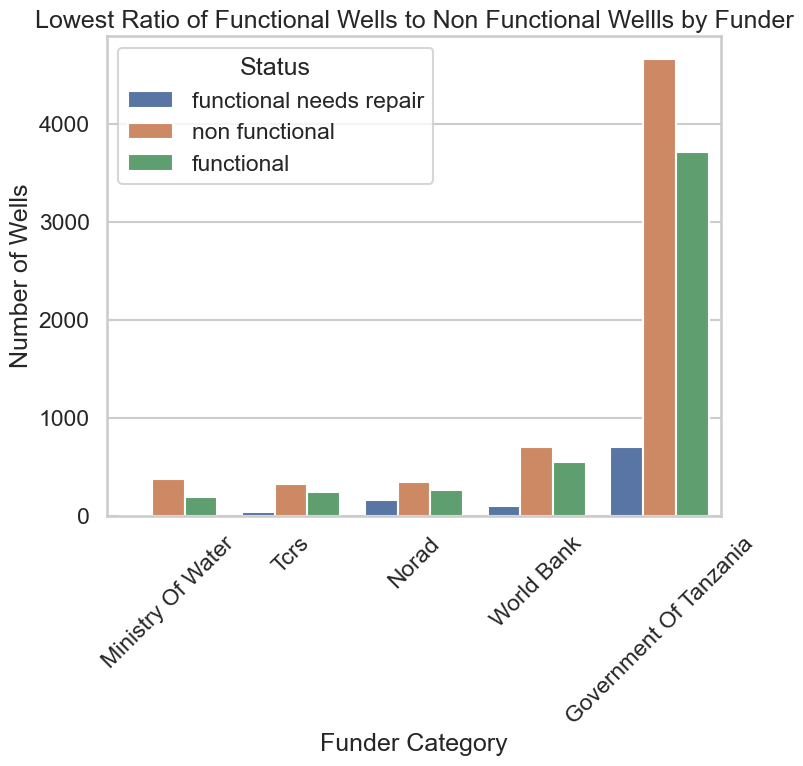

In [800]:
# Filter the dataset to only include these funders in the cleaned funder column
train_df_funder_subset = train_df[train_df['funder'].isin(most_effective_funders)]

# Plot the distribution by funder and status for the selected funders
plt.figure(figsize=(8, 8))
sns.countplot(data=train_df_funder_subset, x='funder', hue='status_group', 
              order=most_effective_funders)
plt.xticks(rotation=45)
plt.title('Lowest Ratio of Functional Wells to Non Functional Wellls by Funder')
plt.xlabel('Funder Category')
plt.ylabel('Number of Wells')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Top 20 installers:
 ['DWE', 'Unknown', 'Government', 'RWE', 'Commu', 'DANIDA', 'KKKT', 'Hesawa', 'TCRS', 'Central government', 'CES', 'Community', 'DANID', 'District Council', 'HESAWA', 'LGA', 'World vision', 'WEDECO', 'TASAF', 'District council']

Unique values in installer_cat: 21


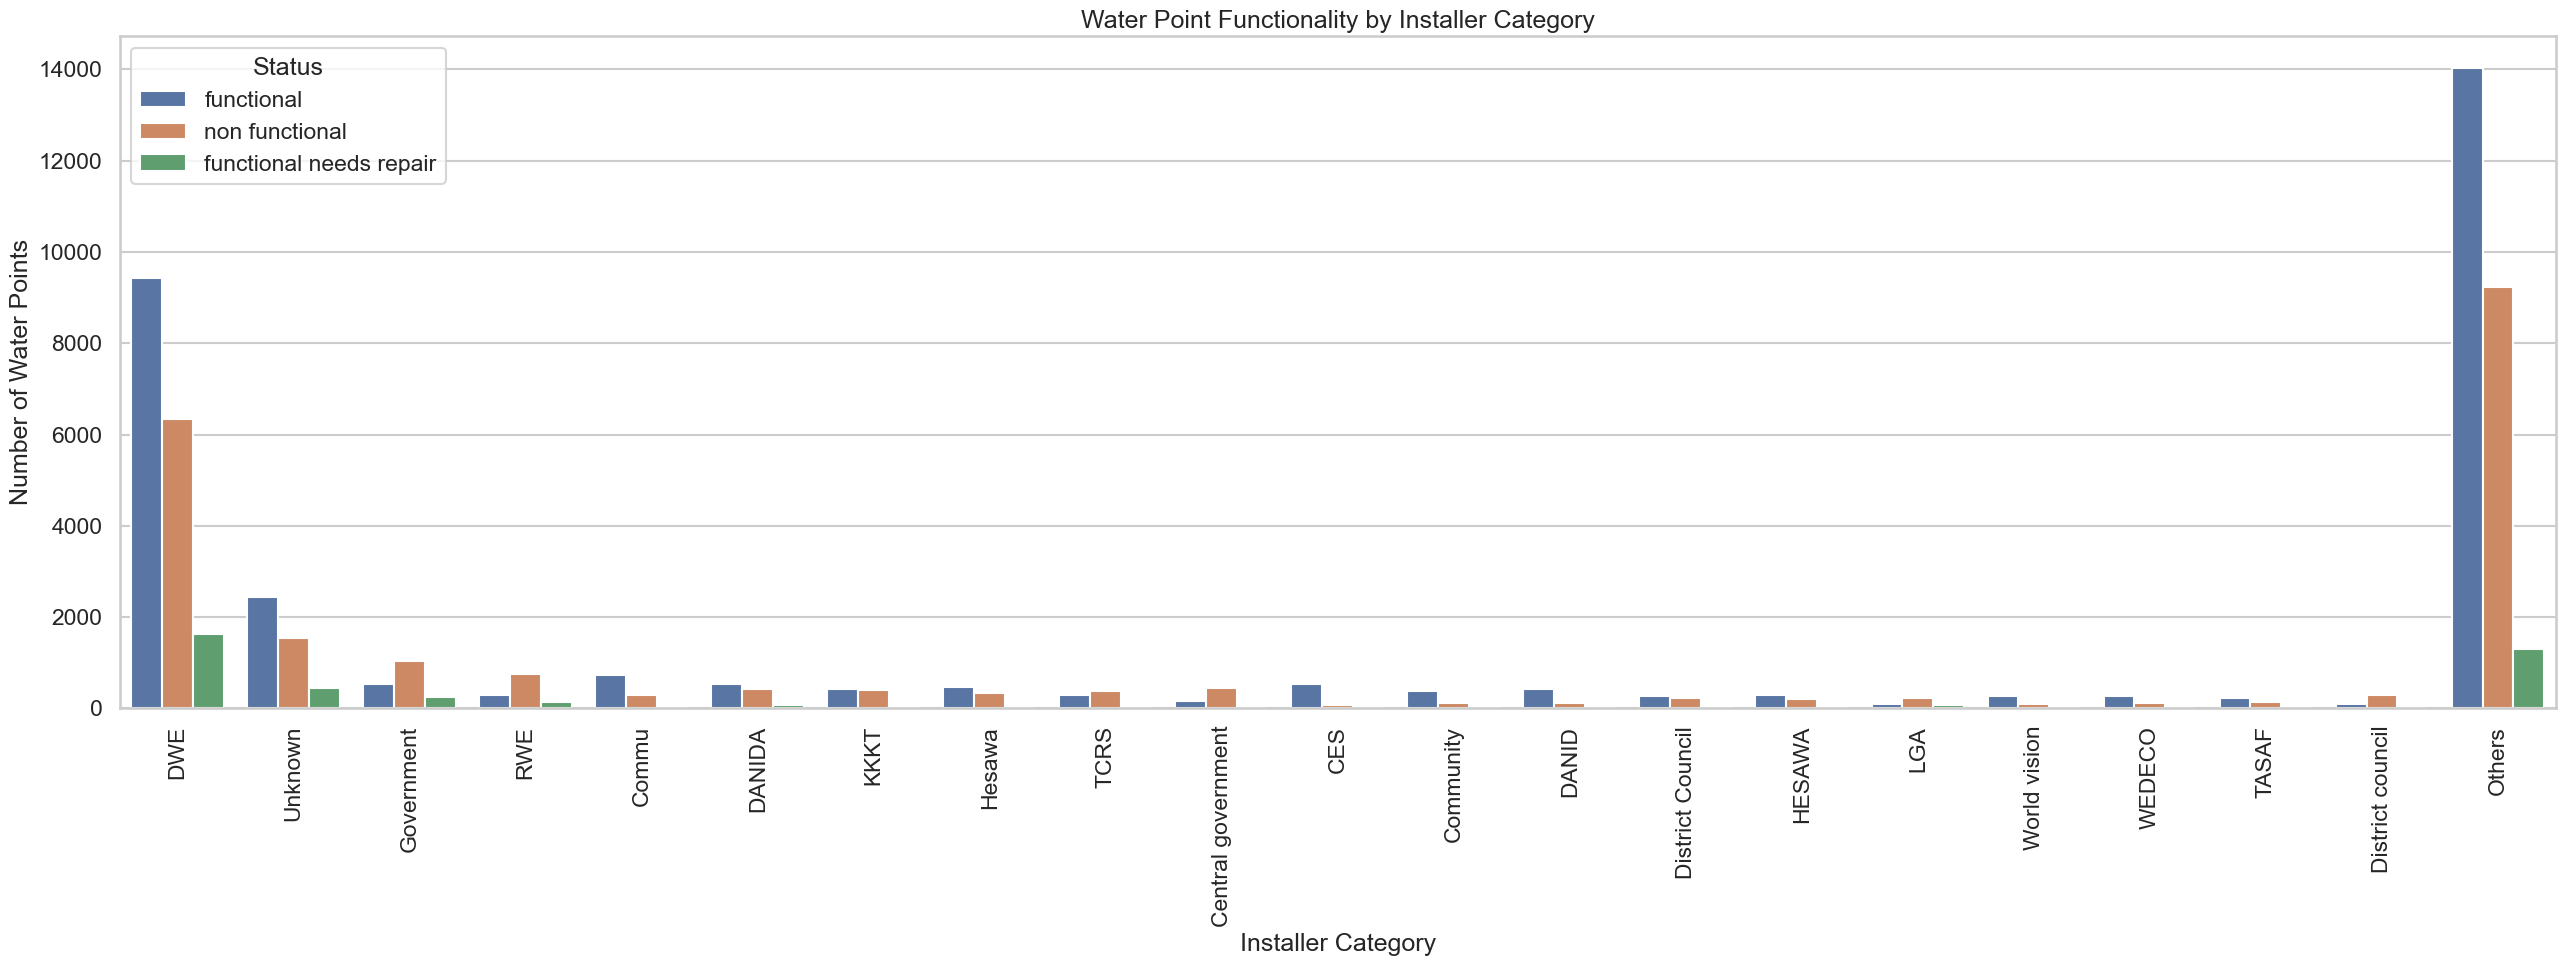

In [801]:
# Clean installer column: replace missing values and '0' with 'Unknown'
train_df['installer'] = train_df['installer'].fillna('Unknown')
train_df['installer'] = train_df['installer'].replace('0', 'Unknown')

# Check the top 20 most common installer values
top_20_installers = train_df['installer'].value_counts().head(20).index.tolist()
print("Top 20 installers:\n", top_20_installers)

# Create a new cleaned categorical installer column
train_df['installer_cat'] = train_df['installer'].copy()
train_df.loc[~train_df['installer_cat'].isin(top_20_installers), 'installer_cat'] = 'Others'

# Check the number of unique categories in installer_cat
print(f"\nUnique values in installer_cat: {train_df['installer_cat'].nunique()}")

# Subset data for plotting (top 20 installers + 'Others')
train_df_installer_subset = train_df[train_df['installer_cat'].isin(top_20_installers + ['Others'])]

# Plot distribution by installer and water pump status
plt.figure(figsize=(26, 10))
sns.countplot(data=train_df_installer_subset, x='installer_cat', hue='status_group',
              order=top_20_installers + ['Others'])
plt.xticks(rotation=90)
plt.title('Water Point Functionality by Installer Category')
plt.xlabel('Installer Category')
plt.ylabel('Number of Water Points')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


We can draw a similar conclusion when analyzing installers. Pumps installed by international NGOs and foreign contractors consistently show higher functionality, likely due to standardized installation procedures and follow-up support.

In [802]:
# Funder and installer columns can be dropped
drop_cols += ['funder','installer']

# Gps_height

The gps_height variable measures elevation in meters and ranges from -90 to 2270, despite Tanzania’s lowest elevation point being around sea level (0 meters). Thus, negative values and many zero-values (34.4%) represent erroneous or missing data. Rather than global mean imputation, a hierarchical geographical approach is adopted: missing values are imputed by averaging GPS heights of nearby water points, starting from the smallest administrative level (subvillage) and progressively broadening to larger levels (ward, LGA, district) if necessary. This method preserves the local context and relationships in the data.

In [803]:
# Replace zeros and negatives with NaN (invalid GPS heights)
train_df['gps_height'] = train_df['gps_height'].apply(lambda x: np.nan if x <= 0 else x)

# Hierarchical geographical imputation function
def hierarchical_impute(df, group_cols, target_col='gps_height'):
    for group in group_cols:
        df[target_col] = df.groupby(group)[target_col].transform(
            lambda x: x.fillna(x.mean())
        )
    return df

# Perform hierarchical imputation
group_hierarchy = ['subvillage', 'ward', 'lga', 'district_code', 'region']
train_df = hierarchical_impute(train_df, group_hierarchy)

# Verify remaining missing values
remaining_nans = train_df['gps_height'].isna().sum()
print(f"Remaining missing values after hierarchical imputation: {remaining_nans}")

# For any remaining missing values (if necessary), fill with global mean or median
median_height = train_df['gps_height'].median()
train_df['gps_height'] = train_df['gps_height'].fillna(median_height)
# Verify no more missing values
print("Final missing values:", train_df['gps_height'].isna().sum())


Remaining missing values after hierarchical imputation: 0
Final missing values: 0


# latitude and longitude

The variables latitude and longitude were validated using Google Maps, defining valid Tanzanian geographical boundaries (latitude between -11.73 and -0.96, longitude between 29.50 and 40.37). However, zero values in the dataset clearly indicate missing data, especially for the regions Mwanza and Shinyanga. These zeros are impossible coordinates for Tanzania and need to be imputed. Similar to gps_height, imputation uses a hierarchical geographical approach, starting from small administrative areas (subvillage, ward) and expanding to broader ones (LGA, district, region). After this, remaining missing values (notably from the Geita region) should be manually corrected with accurate geographic coordinates.

In [804]:
# Validate coordinate boundaries and identify invalid zeros
valid_latitude_range = (-11.73, -0.96)
valid_longitude_range = (29.50, 40.37)

# Replace zeros with NaNs (invalid or missing coordinates)
train_df['latitude'] = train_df['latitude'].apply(lambda x: np.nan if x == 0 else x)
train_df['longitude'] = train_df['longitude'].apply(lambda x: np.nan if x == 0 else x)

# Verify counts of missing coordinates
print(f"Missing latitudes: {train_df['latitude'].isna().sum()}")
print(f"Missing longitudes: {train_df['longitude'].isna().sum()}")

# Hierarchical geographical imputation function
def hierarchical_impute_coords(df, group_cols, coord_cols=['latitude', 'longitude']):
    for coord in coord_cols:
        for group in group_cols:
            df[coord] = df.groupby(group)[coord].transform(lambda x: x.fillna(x.mean()))
    return df

# Perform hierarchical imputation for coordinates
group_hierarchy = ['subvillage', 'ward', 'lga', 'district_code', 'region']
train_features_imputed = hierarchical_impute_coords(train_df, group_hierarchy)

# Check remaining missing coordinates
remaining_missing_coords = train_features_imputed[['latitude', 'longitude']].isna().sum()
print("Remaining missing coordinates after hierarchical imputation:")
print(remaining_missing_coords)

# Identify remaining missing location (expected from Geita)
geita_missing = train_features_imputed[train_features_imputed['latitude'].isna() | train_features_imputed['longitude'].isna()]
print(f"Remaining missing entries from Geita LGA: {len(geita_missing)}")

# Manual imputation example (for Geita region, replace with accurate known coordinates)
geita_latitude = -2.8667
geita_longitude = 32.1667

train_features_imputed.loc[
    train_features_imputed['lga'] == 'Geita', ['latitude', 'longitude']
] = [geita_latitude, geita_longitude]

# Final verification
print("Final check of missing values:")
print(train_features_imputed[['latitude', 'longitude']].isna().sum())


Missing latitudes: 0
Missing longitudes: 1812
Remaining missing coordinates after hierarchical imputation:
latitude     0
longitude    0
dtype: int64
Remaining missing entries from Geita LGA: 0
Final check of missing values:
latitude     0
longitude    0
dtype: int64


# Population

The variable population has an unusually high proportion of zeros (36%), indicating missing or invalid data. Additionally, the population values are highly skewed—most are low, but a small percentage (13%) are statistical outliers with extremely high values, reflecting urban areas. Due to this skewness and the realistic scenario of urban versus rural differences, outliers should not be removed. However, zeros can be treated as missing values and imputed with the median rather than the mean to prevent distortion caused by extreme values.

Percentage of zero population values: 35.99%


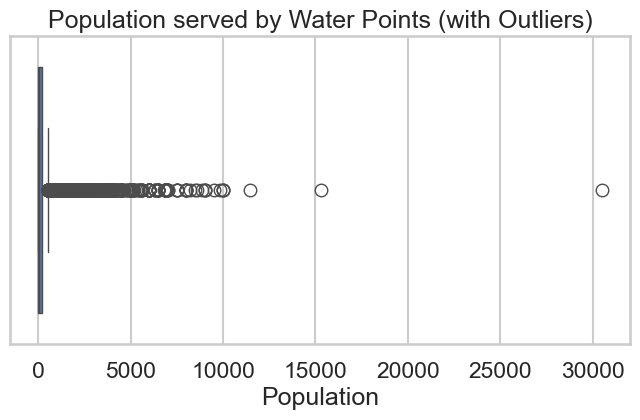

Remaining missing population values: 0


In [805]:

# Identify the percentage of zero values
zero_population_pct = (train_df['population'] == 0).mean() * 100
print(f"Percentage of zero population values: {zero_population_pct:.2f}%")

# Boxplot showing skewness and outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=train_df['population'])
plt.title('Population served by Water Points (with Outliers)')
plt.xlabel('Population')
plt.show()

# Replace zero values with NaN for median imputation
train_df['population'] = train_df['population'].replace(0, np.nan)

# Median imputation due to high skewness
population_median = train_df['population'].median()
train_df['population'] = train_df['population'].fillna(population_median)

# Verify no remaining missing values
print(f"Remaining missing population values: {train_df['population'].isna().sum()}")



# public_meeting

The variable public_meeting indicates if the water pump was approved in a public meeting. A majority (85.88%) of pumps were approved publicly, 8.51% were not, and 5.61% have missing values. Given the relatively small proportion of missing data, these values can be imputed with the most frequent value (mode), assuming the majority decision is likely representative.

Distribution of public_meeting (%):
 public_meeting
True     85.877104
False     8.510101
NaN       5.612795
Name: proportion, dtype: float64


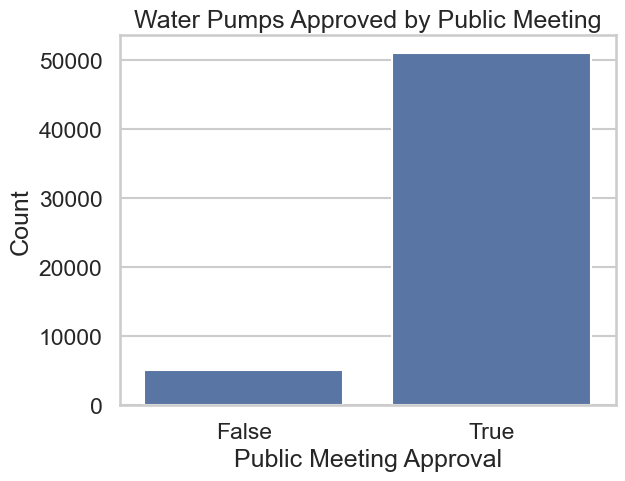

Remaining missing values after imputation: 0


/var/folders/02/f4zvv9ps5hl4fw2wd6d985pc0000gn/T/ipykernel_13420/2803487788.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['public_meeting'] = train_df['public_meeting'].fillna(mode_public_meeting).astype(bool)


In [806]:

# Check initial distribution including missing values
public_meeting_dist = train_df['public_meeting'].value_counts(dropna=False, normalize=True) * 100
print("Distribution of public_meeting (%):\n", public_meeting_dist)

# Visualization of distribution
sns.countplot(x=train_df['public_meeting'])
plt.title('Water Pumps Approved by Public Meeting')
plt.xlabel('Public Meeting Approval')
plt.ylabel('Count')
plt.show()

# Impute missing values with mode (most common value)

mode_public_meeting = train_df['public_meeting'].mode()[0]
train_df['public_meeting'] = train_df['public_meeting'].fillna(mode_public_meeting).astype(bool)

# Verify no remaining missing values
print(f"Remaining missing values after imputation: {train_df['public_meeting'].isna().sum()}")


# Permit

The variable permit indicates whether a permit was granted for the water pump. It has three possible states: True (38,852 cases), False (17,492 cases), and Unknown or missing (3,056 cases). The unknown cases (5% of total data) can be imputed safely with the mode, as this reflects the most common scenario.

Distribution of 'permit' variable (%):
 permit
True     65.407407
False    29.447811
NaN       5.144781
Name: proportion, dtype: float64


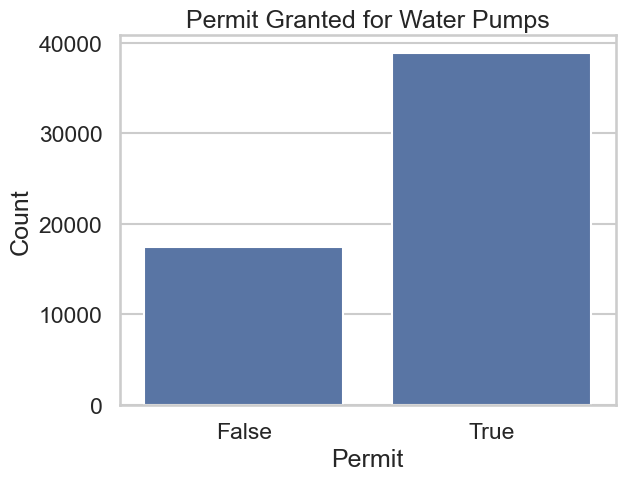

Remaining missing values after imputation: 0


/var/folders/02/f4zvv9ps5hl4fw2wd6d985pc0000gn/T/ipykernel_13420/2194036413.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['permit'] = train_df['permit'].fillna(mode_permit)


In [807]:

# Distribution of 'permit' variable
permit_dist = train_df['permit'].value_counts(dropna=False, normalize=True) * 100
print("Distribution of 'permit' variable (%):\n", permit_dist)

# Visualize distribution
sns.countplot(x=train_df['permit'])
plt.title('Permit Granted for Water Pumps')
plt.xlabel('Permit')
plt.ylabel('Count')
plt.show()

# Impute missing values (unknown) with mode
mode_permit = train_df['permit'].mode()[0]
train_df['permit'] = train_df['permit'].fillna(mode_permit)

# Explicitly set data type (avoids future warnings)
train_df['permit'] = train_df['permit'].astype(bool)

# Verify no remaining missing values
print(f"Remaining missing values after imputation: {train_df['permit'].isna().sum()}")


# Construction year

The variable construction_year ranges from 1960 to 2013 but has a large proportion of missing values (35%). Rather than imputing these missing values, a categorical approach is taken, grouping years into decades ('60s, '70s, '80s, '90s, '00s, '10s) and explicitly labeling missing years as a separate category called "missing". This preserves information about the uncertainty in the data and reduces potential bias.

Missing construction years: 34.86%
construction_decade
missing    34.863636
00s        25.808081
90s        12.925926
80s         9.390572
10s         8.688552
70s         7.417508
60s         0.905724
Name: proportion, dtype: float64


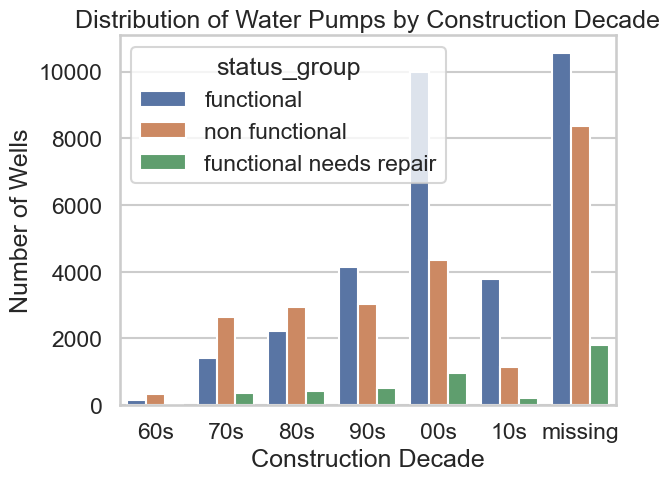

In [808]:
# Check percentage of missing (zero) values
missing_pct = (train_df['construction_year'] == 0).mean() * 100
print(f"Missing construction years: {missing_pct:.2f}%")

# Replace zero with np.nan for easier handling
train_df['construction_year'] = train_df['construction_year'].replace(0, pd.NA)

# Define buckets (decades) function
def categorize_year(year):
    if pd.isna(year):
        return 'missing'
    elif 1960 <= year < 1970:
        return '60s'
    elif 1970 <= year < 1980:
        return '70s'
    elif 1980 <= year < 1990:
        return '80s'
    elif 1990 <= year < 2000:
        return '90s'
    elif 2000 <= year < 2010:
        return '00s'
    elif 2010 <= year <= 2013:
        return '10s'
    else:
        return 'unknown'

# Apply categorization
train_df['construction_decade'] = train_df['construction_year'].apply(categorize_year)

# Verify bucket distribution
bucket_dist = train_df['construction_decade'].value_counts(normalize=True) * 100
print(bucket_dist)

# Visualize distribution
sns.countplot(x='construction_decade', data=train_df, hue='status_group', order=['60s', '70s', '80s', '90s', '00s', '10s', 'missing'])
plt.title('Distribution of Water Pumps by Construction Decade')
plt.xlabel('Construction Decade')
plt.ylabel('Number of Wells')
plt.show()

As we can see pumps over 30 years old have a significantly higher failure rate, making age one a strong predictor of non-functionality.

# Extraction

The dataset contains three related variables on water extraction types: extraction_type (most detailed, 21 categories), extraction_type_group (moderate detail, 13 categories), and extraction_type_class (broad, 7 categories). For simplicity and clarity in the first analysis iteration, we select extraction_type_group as it effectively balances granularity and category proportion without requiring initial modifications.


Hierarchical Crosstab with Percentages:



percentage
extraction_type_class extraction_type_group extraction_type                      
gravity               gravity               gravity                         45.08
handpump              afridev               afridev                          2.98
                      india mark ii         india mark ii                    4.04
                      india mark iii        india mark iii                   0.16
                      nira/tanira           nira/tanira                     13.73
                      other handpump        other - mkulima/shinyanga        0.00
                                            other - play pump                0.14
                                            other - swn 81                   0.39
                                            walimi                           0.08
                      swn 80                swn 80                           6.18
motorpump             mono                  mono                             4.82
                      other motorpump       cemo                             0.15
                                            climax                           0.05
other                 other                 other                           10.82
rope pump             rope pump             other - rope pump                0.76
submersible           submersible           ksb                              2.38
                                            submersible                      8.02
wind-powered          wind-powered          windmill                         0.20

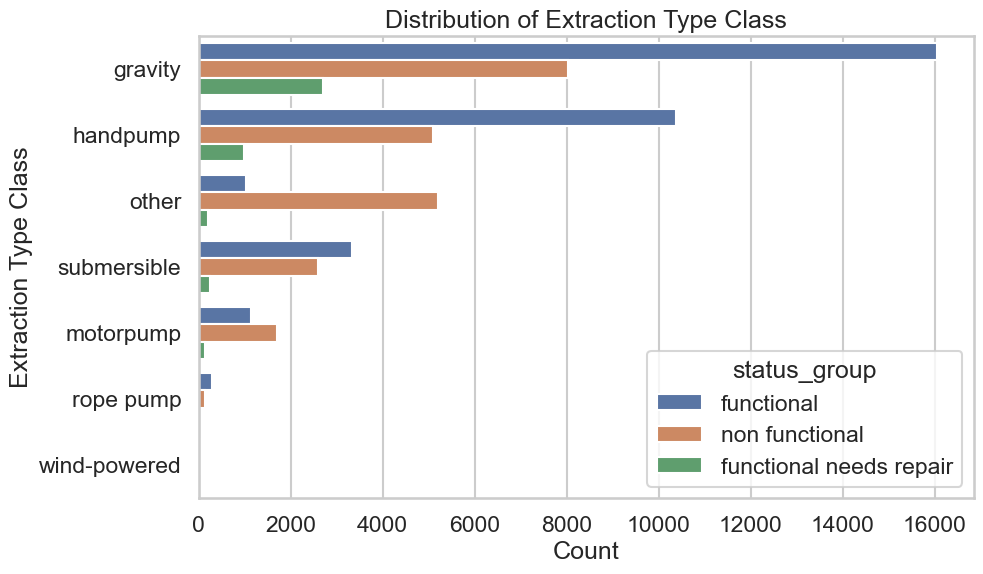

In [809]:
# Hierarchical grouping with counts
grouped_counts = train_df.groupby([
    'extraction_type_class', 
    'extraction_type_group', 
    'extraction_type'
]).size().reset_index(name='count')

# Calculate percentages relative to total
total_pumps = len(train_df)
grouped_counts['percentage'] = (grouped_counts['count'] / total_pumps * 100).round(2)

# Display hierarchical structure clearly
hierarchical_table = grouped_counts.set_index(['extraction_type_class', 'extraction_type_group', 'extraction_type'])

# Display the hierarchical table
print("\nHierarchical Crosstab with Percentages:\n")
display(hierarchical_table[['percentage']])

# Visualize the distribution of extraction_type_class
extraction_class_dist = train_df['extraction_type_class'].value_counts(normalize=True) * 100

plt.figure(figsize=(10,6))
sns.countplot(y='extraction_type_class', data=train_df,
              order=extraction_class_dist.index,  hue='status_group')
plt.title('Distribution of Extraction Type Class')
plt.xlabel('Count')
plt.ylabel('Extraction Type Class')
plt.show()

# add columns to drop
drop_cols += ['extraction_type', 'extraction_type_class'] 

# Management

The columns scheme_management, management, and management_group contain related information about water point management. scheme_management has similar categories to management but includes 3,877 missing values, making management preferable. management_group provides broader groupings of the detailed categories in management. Since detailed information from management is more valuable for analysis, we keep the management column and drop scheme_management and management_group to reduce redundancy.

In [810]:
# Check missing values
missing_scheme = train_df['scheme_management'].isna().sum()
missing_management = train_df['management'].isna().sum()
missing_management_group = train_df['management_group'].isna().sum()
print(f"Missing values:\n- scheme_management: {missing_scheme}\n- management: {missing_management} \n- management_group: {missing_management_group}")

# Compare number of unique values
print("\nUnique value counts:")
print(f"scheme_management: {train_df['scheme_management'].nunique()}")
print(f"management: {train_df['management'].nunique()}")
print(f"management_group: {train_df['management_group'].nunique()}")

# Value distributions (normalized for comparison)
print("\nDistribution of 'management':")
print(train_df['management'].value_counts(normalize=True) * 100)

print("\nDistribution of 'scheme_management':")
print(train_df['scheme_management'].value_counts(normalize=True) * 100)

print("\nDistribution of 'management_group':")
print(train_df['management_group'].value_counts(normalize=True) * 100)

# Check how management_group is built from management
group_mapping = train_df.groupby(['management_group', 'management']).size().unstack().fillna(0)
print("\nGrouped 'management_group' vs 'management' mapping:")
display(group_mapping)

#  Drop the redundant columns
drop_cols +=['scheme_management', 'management_group']


Missing values:
- scheme_management: 3878
- management: 0 
- management_group: 0

Unique value counts:
scheme_management: 11
management: 12
management_group: 5

Distribution of 'management':
management
vwc                 68.193603
wug                 10.968013
water board          4.937710
wua                  4.267677
private operator     3.318182
parastatal           2.976431
water authority      1.521886
other                1.420875
company              1.153199
unknown              0.944444
other - school       0.166667
trust                0.131313
Name: proportion, dtype: float64

Distribution of 'scheme_management':
scheme_management
VWC                 66.267426
WUG                  9.376463
Water authority      5.678830
WUA                  5.192536
Water Board          4.949389
Parastatal           3.025828
Private operator     1.914556
Company              1.910954
Other                1.379633
SWC                  0.174706
Trust                0.129678
Name: proportion, d

management,company,other,other - school,parastatal,private operator,trust,unknown,vwc,water authority,water board,wua,wug
management_group,,,,,,,,,,,,
commercial,685.0,0.0,0.0,0.0,1971.0,78.0,0.0,0.0,904.0,0.0,0.0,0.0
other,0.0,844.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
parastatal,0.0,0.0,0.0,1768.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unknown,0.0,0.0,0.0,0.0,0.0,0.0,561.0,0.0,0.0,0.0,0.0,0.0
user-group,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40507.0,0.0,2933.0,2535.0,6515.0


## Payment

The dataset contains two nearly identical variables, payment and payment_type, differing only slightly in naming conventions (e.g., "pay when scheme fails" vs "pay on failure"). Since both represent the same information, retaining both is redundant. Therefore, we retain only the payment variable and exclude payment_type from further analysis.

In [811]:
# Check unique values in both variables
print("Unique values in 'payment':")
print(train_df['payment'].unique())

print("\nUnique values in 'payment_type':")
print(train_df['payment_type'].unique())

# Cross-tabulation to confirm redundancy clearly
crosstab_payment = pd.crosstab(train_df['payment'], train_df['payment_type'])
print("\nCross-tabulation of 'payment' vs 'payment_type':")
print(crosstab_payment)

# Drop 'payment_type' from dataset due to redundancy
drop_cols += ['payment_type']

Unique values in 'payment':
['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']

Unique values in 'payment_type':
['annually' 'never pay' 'per bucket' 'unknown' 'on failure' 'other'
 'monthly']

Cross-tabulation of 'payment' vs 'payment_type':
payment_type           annually  monthly  never pay  on failure  other  \
payment                                                                  
never pay                     0        0      25348           0      0   
other                         0        0          0           0   1054   
pay annually               3642        0          0           0      0   
pay monthly                   0     8300          0           0      0   
pay per bucket                0        0          0           0      0   
pay when scheme fails         0        0          0        3914      0   
unknown                       0        0          0           0      0   

payment_type           per bucket  unk

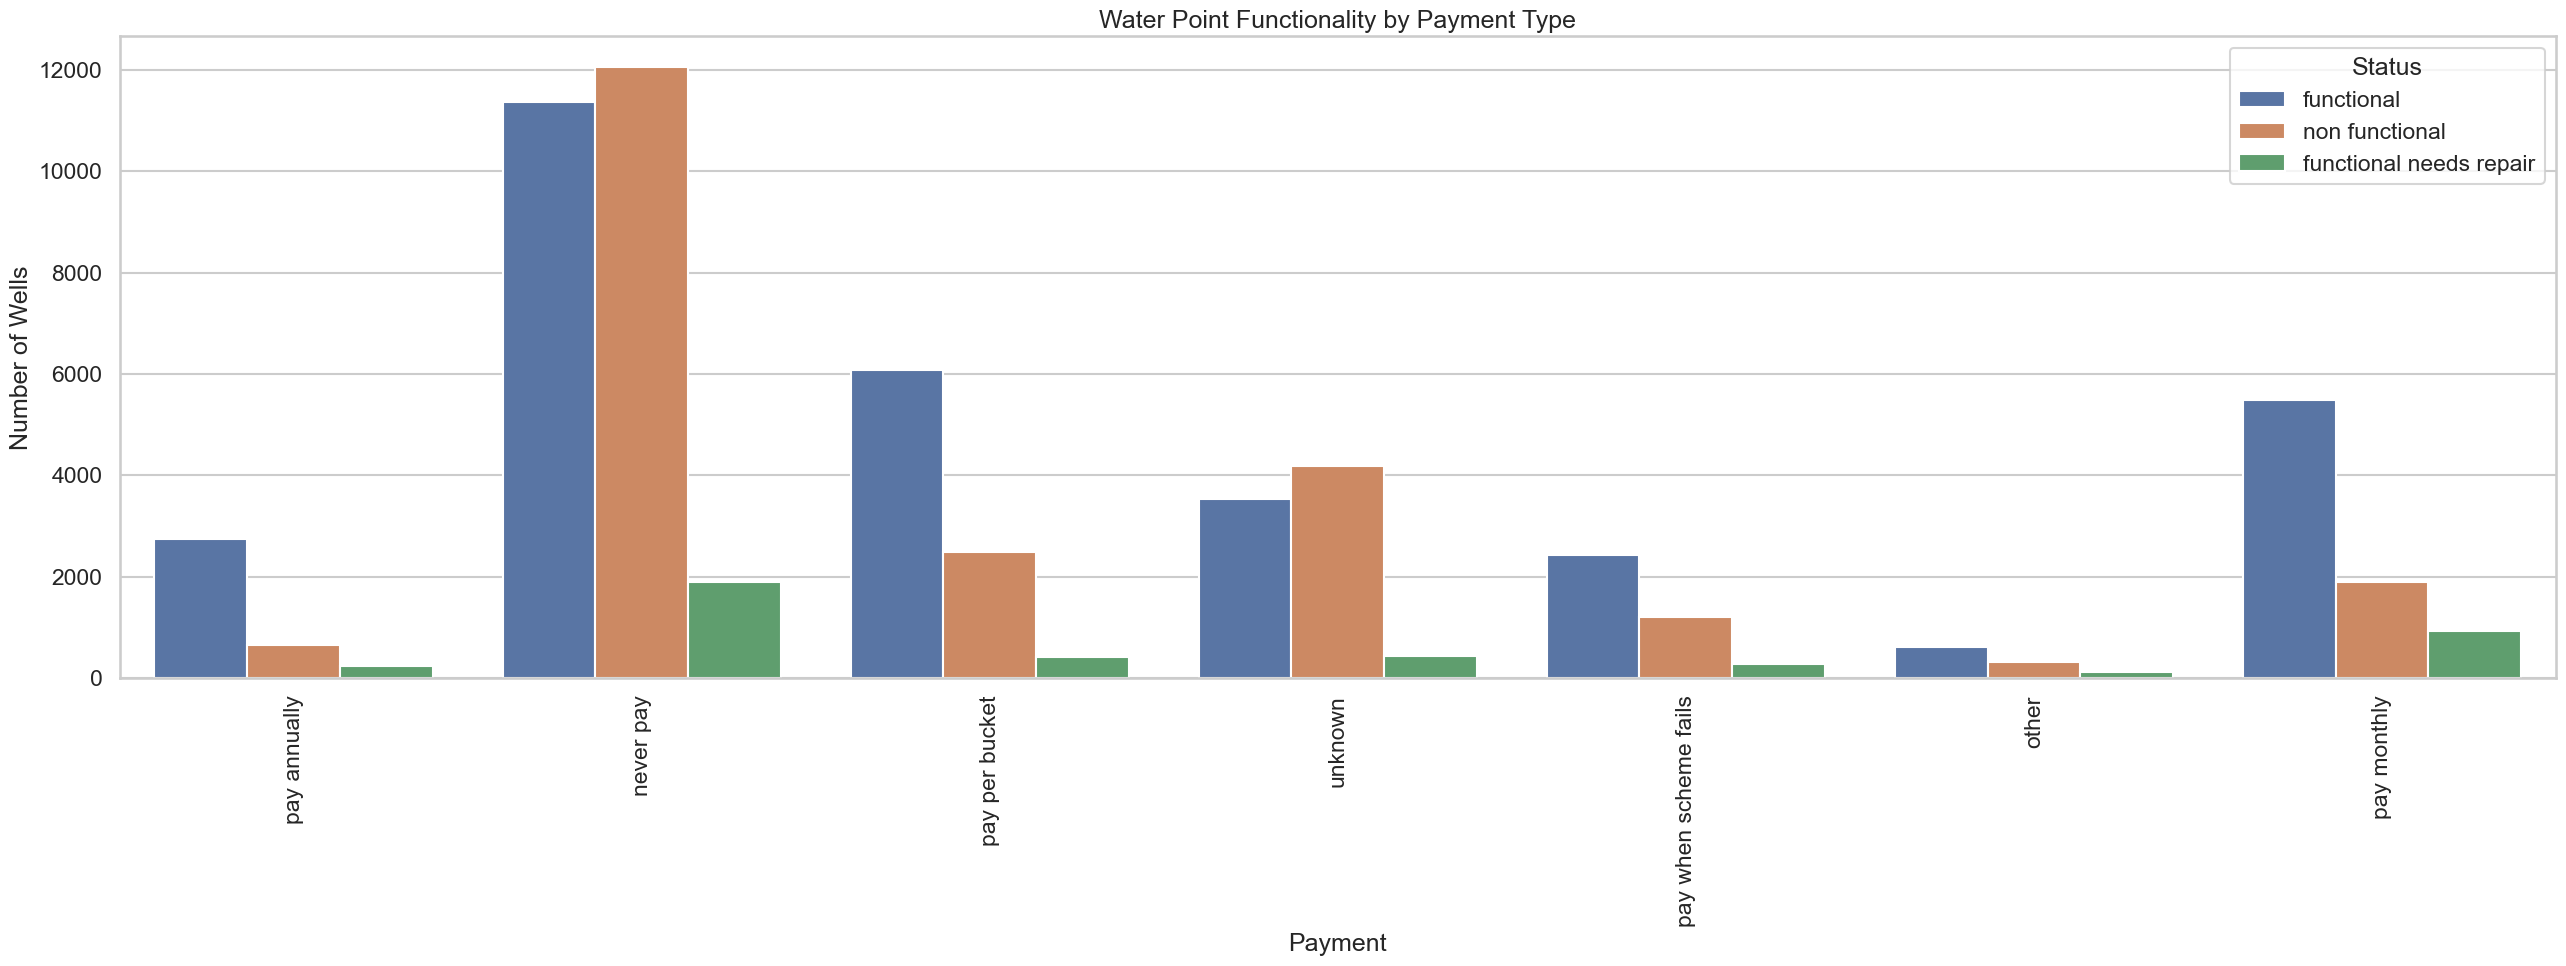

In [812]:
# Plot distribution by payment and pump status
plt.figure(figsize=(26, 10))
sns.countplot(data=train_df, x='payment', hue='status_group')
plt.xticks(rotation=90)
plt.title('Water Point Functionality by Payment Type')
plt.xlabel('Payment')
plt.ylabel('Number of Wells')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


 # Water Quality

The variables water_quality and quality_group contain similar information, but water_quality provides more granularity with additional unique categories (e.g., distinguishing between "salty" and "salty abandoned"). To preserve this extra detail, we retain water_quality and drop quality_group to avoid redundancy.



Unique values in 'water_quality':
water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

Unique values in 'quality_group':
quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64


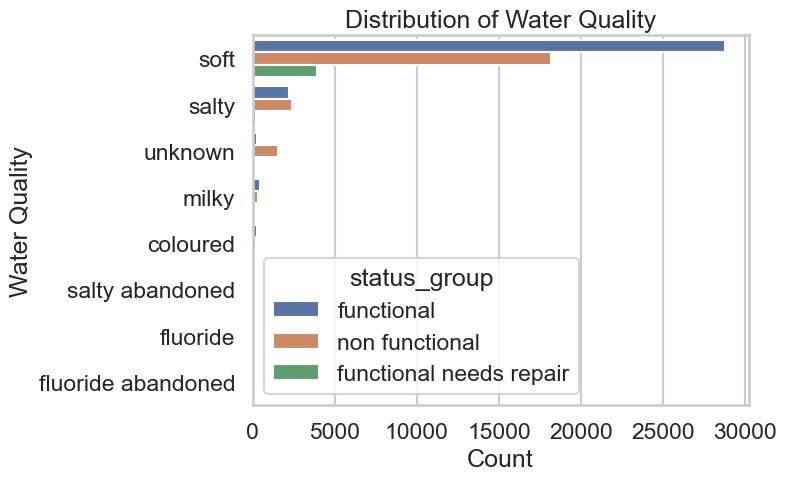

In [813]:
# Check unique value counts for both variables
print("Unique values in 'water_quality':")
print(train_df['water_quality'].value_counts())

print("\nUnique values in 'quality_group':")
print(train_df['quality_group'].value_counts())

# Drop 'quality_group' due to redundancy
drop_cols += ['quality_group']

# Visualize distribution of water_quality for clarity
sns.countplot(y='water_quality', hue= 'status_group',data=train_df,
              order=train_df['water_quality'].value_counts().index)
plt.title('Distribution of Water Quality')
plt.xlabel('Count')
plt.ylabel('Water Quality')
plt.show()

# Water Quantity

The quantity variable has 5 distinct categories, with the majority of water pumps labeled as "enough". The duplicate variable quantity_group is removed due to redundancy. Analysis reveals a strong relationship between water availability (quantity) and pump functionality:

Pumps labeled "dry" have a high likelihood (97%) of being non-functional.

"Enough" water availability is strongly associated with functional pumps (65%).



Crosstab of Quantity vs Pump Functionality (%):
 status_group  functional  functional needs repair  non functional
quantity                                                         
dry                  2.5                      0.6            96.9
enough              65.2                      7.2            27.5
insufficient        52.3                      9.6            38.1
seasonal            57.4                     10.3            32.3
unknown             27.0                      1.8            71.2


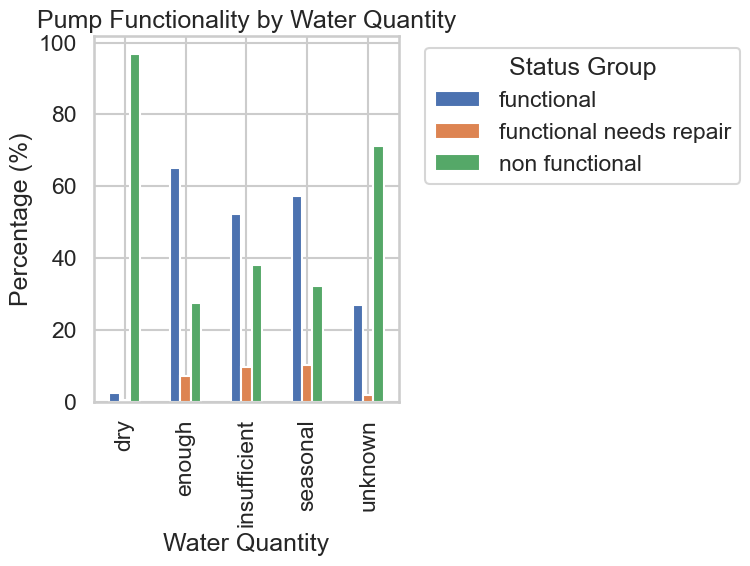

In [814]:
# Verify redundancy of quantity_group
assert (train_df['quantity'] == train_df['quantity_group']).all(), "quantity_group is not redundant"

# Drop redundant column
drop_cols += ['quantity_group']

# Crosstab analysis (clearly showing percentages)
quantity_crosstab = pd.crosstab(train_df['quantity'], train_df['status_group'], normalize='index') * 100
quantity_crosstab = quantity_crosstab.round(1)

# Display crosstab
print("Crosstab of Quantity vs Pump Functionality (%):\n", quantity_crosstab)

# Visualization of crosstab clearly
quantity_crosstab.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Pump Functionality by Water Quantity')
plt.xlabel('Water Quantity')
plt.ylabel('Percentage (%)')
plt.legend(title='Status Group', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# Water Source

Three related columns describe water source: source, source_type, and source_class. The variable source has detailed categories (10 unique values), source_type offers fewer, broader categories (7 values), and source_class is the most general with only 3 values. Considering a balance between detail and simplicity, we retain source_type, as it effectively consolidates similar categories without oversimplifying. The variables source and source_class are dropped to reduce redundancy and complexity.

Unique values in 'source':
source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

Unique values in 'source_type':
source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64

Unique values in 'source_class':
source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

Grouping of 'source_class' by 'source':
source_class  source              
groundwater   hand dtw                  874
              machine dbh             11075
              shallow well            16824
              s

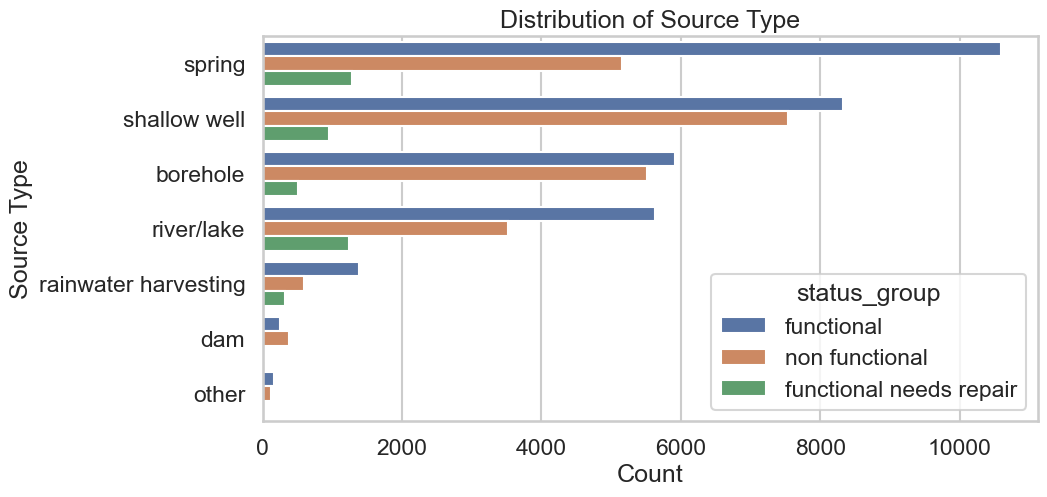

In [815]:
# Check unique value counts
print("Unique values in 'source':")
print(train_df['source'].value_counts())

print("\nUnique values in 'source_type':")
print(train_df['source_type'].value_counts())

print("\nUnique values in 'source_class':")
print(train_df['source_class'].value_counts())

# Group source_class by source to verify categories clearly
source_grouping = train_df.groupby(['source_class', 'source']).size()
print("\nGrouping of 'source_class' by 'source':")
print(source_grouping)

# Keep 'source_type', drop 'source' and 'source_class'
drop_cols +=['source', 'source_class']

# Visualize distribution of retained variable ('source_type') clearly
plt.figure(figsize=(10,5))
sns.countplot(y='source_type', data=train_df,hue = 'status_group', order=train_df['source_type'].value_counts().index)
plt.title('Distribution of Source Type')
plt.xlabel('Count')
plt.ylabel('Source Type')
plt.show()


# Waterpoint

Two variables describe water point types: waterpoint_type (7 unique categories) and waterpoint_type_group (6 categories). The difference is that waterpoint_type splits "communal standpipe" into two subcategories ("communal standpipe multiple" and "communal standpipe single"), affecting 10% of the dataset (6,103 pumps). To retain this meaningful distinction, we keep the more detailed variable (waterpoint_type) and drop waterpoint_type_group to avoid redundancy.

Distribution in 'waterpoint_type':
waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

Distribution in 'waterpoint_type_group':
waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64

Crosstab between 'waterpoint_type_group' and 'waterpoint_type':
waterpoint_type        cattle trough  communal standpipe  \
waterpoint_type_group                                      
cattle trough                    116                   0   
communal standpipe                 0               28522   
dam                                0                   0   
hand pump                          0     

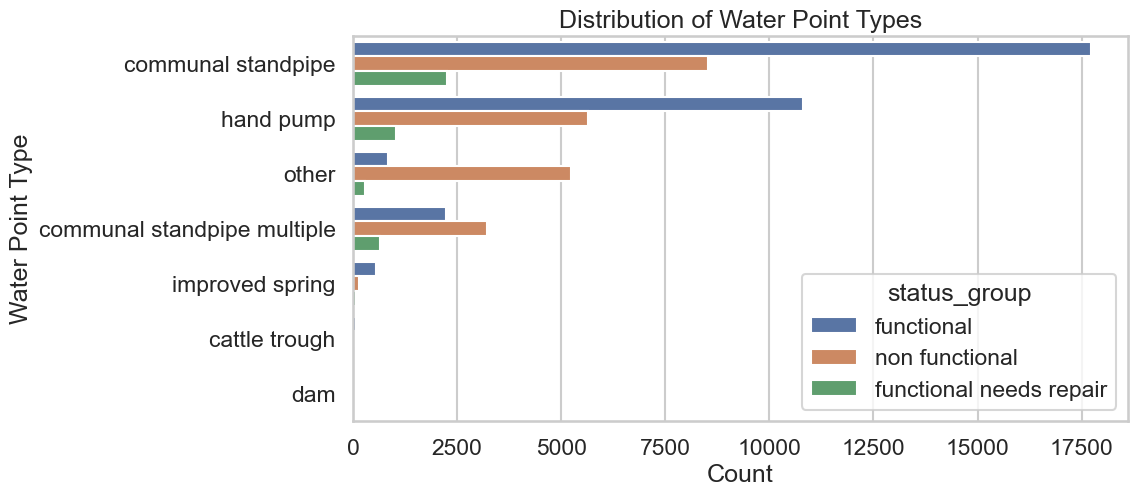

In [816]:

# Check distribution in both variables
print("Distribution in 'waterpoint_type':")
print(train_df['waterpoint_type'].value_counts())

print("\nDistribution in 'waterpoint_type_group':")
print(train_df['waterpoint_type_group'].value_counts())

# Crosstab comparison to explicitly confirm differences
crosstab = pd.crosstab(train_df['waterpoint_type_group'], train_df['waterpoint_type'])
print("\nCrosstab between 'waterpoint_type_group' and 'waterpoint_type':")
print(crosstab)

# Drop redundant variable (less detailed)
drop_cols += ['waterpoint_type_group']

# Visualize final distribution clearly
plt.figure(figsize=(10,5))
sns.countplot(y='waterpoint_type',hue = 'status_group' ,data=train_df,
              order=train_df['waterpoint_type'].value_counts().index)
plt.title('Distribution of Water Point Types')
plt.xlabel('Count')
plt.ylabel('Water Point Type')
plt.show()


# Region and Basin

The dataset includes multiple location-related variables: geographical coordinates (latitude, longitude) and categorical variables (basin, region, district_code). For instance, functional pump rates range from 30% (Lindi and Mtwara) to 68% (Arusha) across regions, and from 41% (Lake Rukwa) to 65% (Lake Nyasa) across basins. A region does not imply a specific bassin for a pump, hence we retain region and basin.

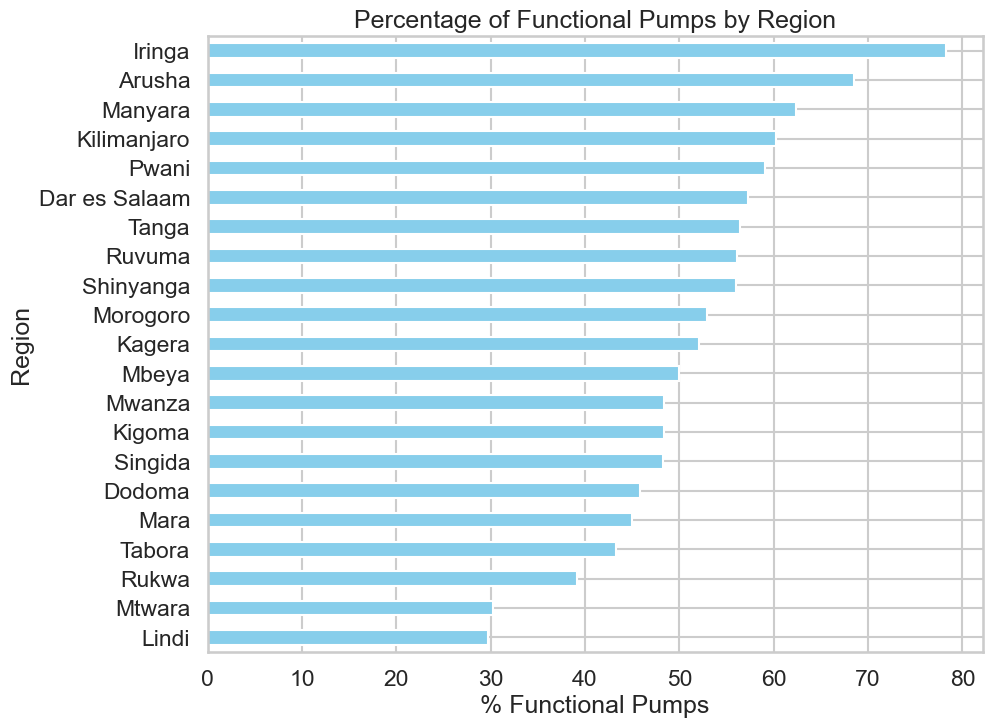

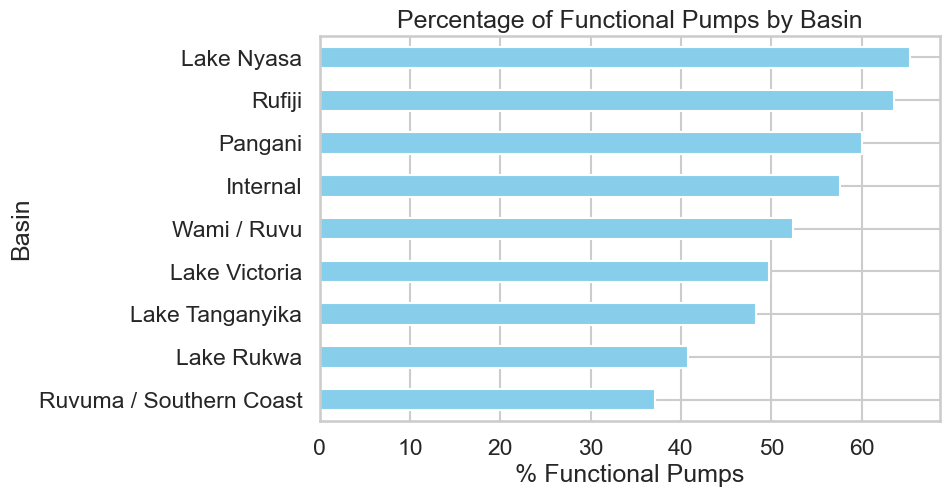

In [817]:
# Analyze functional pump percentages by region
region_status = pd.crosstab(train_df['region'], train_df['status_group'], normalize='index') * 100
region_functional = region_status['functional'].sort_values()

# Plot region functionality
plt.figure(figsize=(10, 8))
region_functional.plot(kind='barh', color='skyblue')
plt.xlabel('% Functional Pumps')
plt.ylabel('Region')
plt.title('Percentage of Functional Pumps by Region')
plt.show()

# Analyze functional pump percentages by basin
basin_status = pd.crosstab(train_df['basin'], train_df['status_group'], normalize='index') * 100
basin_functional = basin_status['functional'].sort_values()

# Plot basin functionality
plt.figure(figsize=(8, 5))
basin_functional.plot(kind='barh', color='skyblue')
plt.xlabel('% Functional Pumps')
plt.ylabel('Basin')
plt.title('Percentage of Functional Pumps by Basin')
plt.show()




In [818]:
# Create a crosstab between basin and region
basin_region_ct = pd.crosstab(train_df['region'], train_df['basin'])

# Display crosstab clearly
print("Crosstab between Region and Basin:")
display(basin_region_ct)



Crosstab between Region and Basin:


basin,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu
region,,,,,,,,,
Arusha,1309,0,0,0,32,2009,0,0,0
Dar es Salaam,0,0,0,0,0,0,0,0,805
Dodoma,827,0,0,0,0,0,359,0,1015
Iringa,0,1582,0,0,0,0,3712,0,0
Kagera,0,0,0,341,2975,0,0,0,0
Kigoma,0,0,0,2816,0,0,0,0,0
Kilimanjaro,169,0,0,0,0,4210,0,0,0
Lindi,0,0,0,0,0,0,90,1456,0
Manyara,1206,0,0,0,0,288,0,0,89


# Target : status_group

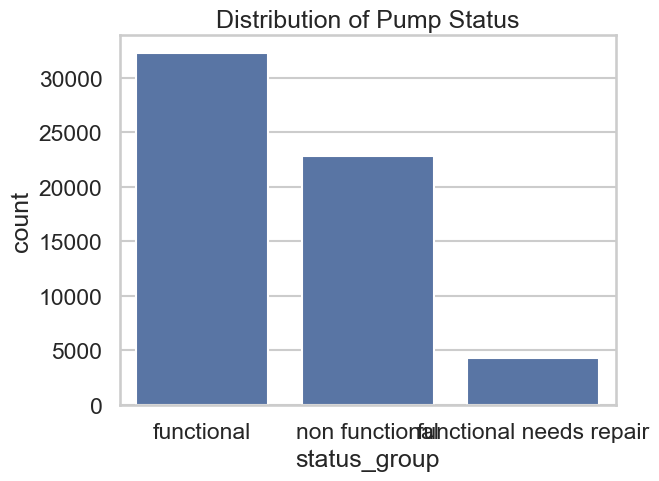

scheme_name          28810
construction_year    20709
scheme_management     3878
subvillage             371
wpt_name                 2
dtype: int64


In [819]:
# Check distribution of target
sns.countplot(x='status_group', data=train_df)
plt.title('Distribution of Pump Status')
plt.show()

# Check for missing values
missing_vals = train_df.isnull().sum().sort_values(ascending=False)
print(missing_vals[missing_vals > 0])




# Drop unecessary columns

The columns wpt_name, scheme_name do not contribute meaningful information regarding the functionality of water points. They are mostly identifiers or duplicates of more informative variables. Additionally, region_code is dropped because the region variable already captures regional information in a more interpretable way. Before removing these columns, we verified that the dataset contains no duplicate rows. num_private contains mostly zeros, so no information. Recorded_by does not give any information about functionnality. We don't need date_recorded as we imputed in rrecording_season

In [820]:

# Replace missing values in 'subvillage' with 'Unknown'
train_df['subvillage'] = train_df['subvillage'].fillna('Unknown')

# Print value counts per class
print(train_df['subvillage'].value_counts())


subvillage
Madukani        508
Shuleni         506
Majengo         502
Kati            373
Unknown         371
               ... 
Nguvu Kazi A      1
Kavuga            1
Ngondombwito      1
Mkonomre          1
Moa/Mwereme       1
Name: count, Length: 19288, dtype: int64


In [821]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,RecordingSeason,funder_cat,installer_cat,construction_decade
0,69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Long Rains,Others,Others,90s
1,8776,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280.0,True,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Long Rains,Others,Others,10s
2,34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Short Dry,Others,World vision,00s
3,67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,Short Dry,Unicef,Others,80s
4,19728,0.0,2011-07-13,Action In A,1300.0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,150.0,True,GeoData Consultants Ltd,NaN,NaN,True,<NA>,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Long Dry,Others,Others,missing


In [824]:
drop_cols+=['wpt_name','scheme_name','region_code','num_private','recorded_by','construction_year','date_recorded']

In [825]:
drop_cols

['amount_tsh',
 'funder',
 'installer',
 'extraction_type',
 'extraction_type_class',
 'scheme_management',
 'management_group',
 'payment_type',
 'quality_group',
 'quantity_group',
 'source',
 'source_class',
 'waterpoint_type_group',
 'wpt_name',
 'scheme_name',
 'region_code',
 'num_private',
 'recorded_by',
 'construction_year',
 'date_recorded']

In [826]:
train_df.drop(columns=drop_cols, inplace=True)

In [827]:
train_df.head()

,id,gps_height,longitude,latitude,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source_type,waterpoint_type,status_group,RecordingSeason,funder_cat,installer_cat,construction_decade
0,69572,1390.0,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,5,Ludewa,Mundindi,109.0,True,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,Long Rains,Others,Others,90s
1,8776,1399.0,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,2,Serengeti,Natta,280.0,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,Long Rains,Others,Others,10s
2,34310,686.0,37.460664,-3.821329,Pangani,Majengo,Manyara,4,Simanjiro,Ngorika,250.0,True,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,Short Dry,Others,World vision,00s
3,67743,263.0,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,63,Nanyumbu,Nanyumbu,58.0,True,True,submersible,vwc,never pay,soft,dry,borehole,communal standpipe multiple,non functional,Short Dry,Unicef,Others,80s
4,19728,1300.0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,1,Karagwe,Nyakasimbi,150.0,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,Long Dry,Others,Others,missing


In [828]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   gps_height             59400 non-null  float64
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   subvillage             59400 non-null  object 
 6   region                 59400 non-null  object 
 7   district_code          59400 non-null  int64  
 8   lga                    59400 non-null  object 
 9   ward                   59400 non-null  object 
 10  population             59400 non-null  float64
 11  public_meeting         59400 non-null  bool   
 12  permit                 59400 non-null  bool   
 13  extraction_type_group  59400 non-null  object 
 14  management             59400 non-null  object 
 15  pa

# Model

As a first approach, we chose to use a Random Forest model because it’s well-suited for our structured dataset and provides a strong balance between performance and interpretability. Random Forest handles both numerical and categorical variables effectively, is robust to outliers and missing data, and doesn’t require heavy preprocessing like one-hot encoding. It can capture complex, non-linear relationships in the data and gives useful feature importance scores, helping us understand which factors contribute most to pump failure. Overall, it's a reliable and practical choice for building a predictive model in this context.

X DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             59400 non-null  float64
 1   longitude              59400 non-null  float64
 2   latitude               59400 non-null  float64
 3   basin                  59400 non-null  object 
 4   subvillage             59400 non-null  object 
 5   region                 59400 non-null  object 
 6   district_code          59400 non-null  int64  
 7   lga                    59400 non-null  object 
 8   ward                   59400 non-null  object 
 9   population             59400 non-null  float64
 10  public_meeting         59400 non-null  bool   
 11  permit                 59400 non-null  bool   
 12  extraction_type_group  59400 non-null  object 
 13  management             59400 non-null  object 
 14  payment                59400 non-nul

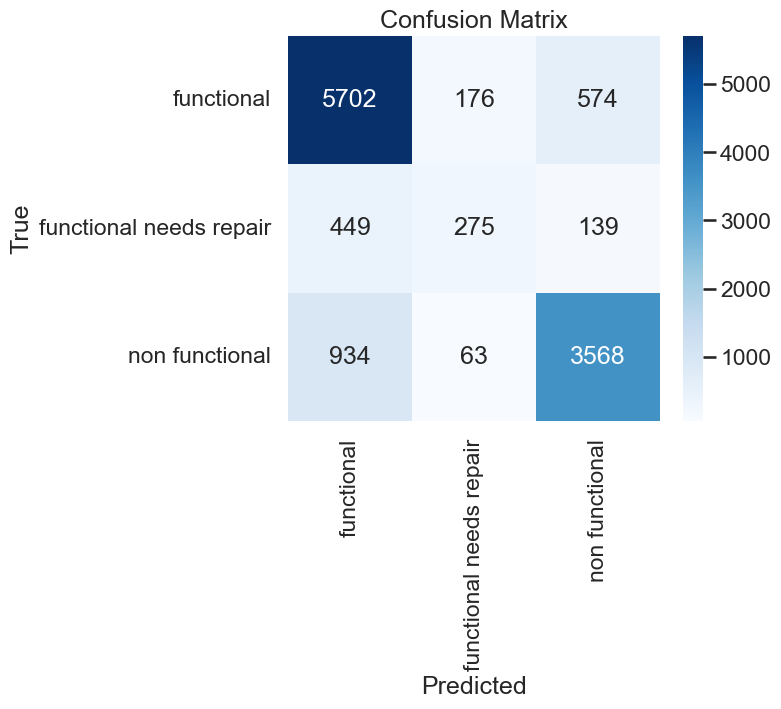

In [ ]:

# -------------------------------
# 1. Prepare the Dataset for Modeling
# -------------------------------

# Assume train_df is your final tidy dataset (as provided earlier)
# Drop columns that don't contribute to functionality: id, date_recorded, and subvillage
cols_to_drop = ['id']
df_model = train_df.drop(columns=cols_to_drop)

# Separate features and target variable (status_group)
X = df_model.drop('status_group', axis=1)
y = df_model['status_group']

# Check structure and data types of features
print("X DataFrame Info:")
print(X.info())

# -------------------------------
# 2. Encode Categorical Features
# -------------------------------
# For tree-based models, one-hot encoding works well.
X_encoded = pd.get_dummies(X, drop_first=False)
print("\nEncoded features shape:", X_encoded.shape)

# -------------------------------
# 3. Split the Dataset
# -------------------------------
# Use stratified sampling to preserve the distribution of status_group
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 4. Train a Random Forest Classifier
# -------------------------------
# class_weight='balanced' automatically adjusts weights to handle class imbalance in the target variable
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced',random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# -------------------------------
# 5. Model Evaluation
# -------------------------------
# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -------------------------------
# 6. Cross-validation for Robustness Check
# -------------------------------
cv_scores = cross_val_score(rf_clf, X_encoded, y, cv=5, scoring='accuracy')
print("\nCross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


# Future Ameliorations

Now that we have a solid Random Forest model with 80% accuracy, we can focus on improving it further. First, we need to address the imbalance in our target variable, especially the "functional needs repair" class, which is underrepresented. This can be done by applying class weights in the model as we did here or try using oversampling techniques.

Next, we should look at feature importance to understand which variables drive the model’s decisions. This can help us improve the quality of those features, group similar categories, or remove irrelevant ones. If key features like water quality, population, funder, or construction year are important, we can refine them.

We can also tune the model's hyperparameters (such as tree depth, number of trees, and minimum samples per split) using GridSearchCV for exemple to get better performance.

To go further, we can try XGBoost, which often performs better than Random Forest on structured data, especially when tuned and adjusted for class imbalance.

Finally, we should move beyond accuracy and focus on metrics like precision, recall, and F1-score—especially for the minority class. Improving recall for “needs repair” is crucial if we want to catch at-risk pumps early. If possible, we can also map the predictions geographically to see if high-risk pumps cluster in certain regions, and refine location-based features accordingly.

In this project, I did not use a formal preprocessing pipeline (such as sklearn.Pipeline) for feature transformation, as I was performing exploratory data analysis (EDA), data cleaning, and preprocessing interactively and iteratively in parallel. This allowed for better flexibility and visibility while understanding the data. However, in a production setting or when building a reusable model, I would implement a full pipeline to structure preprocessing steps like encoding, imputation, scaling (if needed), and model training. This ensures reproducibility, cleaner code, and easier integration into deployment workflows or automated retraining pipelines.

# Annexe

In [ ]:
# Define colors for each status group
status_colors = {
    'functional': 'green',
    'non functional': 'red',
    'functional needs repair': 'orange'
}

# Create a Folium map
map_tanzania = folium.Map(location=[-6.369028, 34.888822], zoom_start=6)

# Plot each point individually
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1.2,  # smaller radius for clarity
        color=status_colors[row['status_group']],
        fill=True,
        fill_opacity=0.6,
        weight=0.1,  # thinner border
        popup=(f"Status: {row['status_group']}<br>"
               f"Region: {row['region']}<br>"
               f"District: {row['district_code']}")
    ).add_to(map_tanzania)

# Save and display map
map_tanzania.save('tanzania_pumps_individual_dots.html')
map_tanzania